2022-12-04 04:01:10.066130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 04:01:10.192201: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 04:01:10.192967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 04:01:10.193920: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 480 files belonging to 4 classes.
Using 384 files for training.


2022-12-04 04:01:15.007600: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-04 04:01:25.055690: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 152 of 256
2022-12-04 04:01:31.600111: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.
2022-12-04 04:01:34.642154: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


anudari


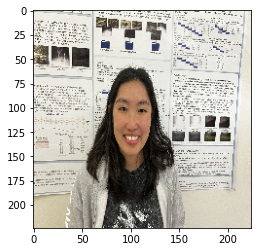

In [1]:
### SETUP ###
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import tensorflow_datasets as tfds

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/kaggle/input/model-by-michael/michael_model_with_aug_v3.h5')

# dirname to be removed and replace by video input variable 'img'
dirname = '/kaggle/input/no-mask/inYourFace-noMask_ds'
img_height = 224
img_width = 224

# get images from dir
train_ds = tf.keras.utils.image_dataset_from_directory(
  dirname,
  validation_split=0.20,
  subset="training",
  seed=123,
  image_size=(img_height, img_width))

class_names = train_ds.class_names
img = None
for images, labels in train_ds.take(1):
  for i in range(2):
    img = images[i].numpy().astype("uint8")
    
# preprocessing the input image for the neural network
input_img = tf.expand_dims(img, 0)

# actual prediction
pred = new_model.predict(input_img)

# matching to the labels
print(class_names[np.argmax(pred)])
plt.imshow(img)